#1.Import Important Liabraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

#2.Mounting Google Drive in Google Colab

In [3]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#3.Read The File and rename Column Text into News_Headline

In [5]:
train_data = pd.read_csv('/content/BBC News Classification/BBC News Train.csv')
train_data = train_data.rename (columns = {'Text':'News_Headline'},inplace =False)
test_data = pd.read_csv('/content/BBC News Classification/BBC News Test.csv')
test_data = test_data.rename (columns = {'Text':'News_Headline'},inplace =False)


#4. Reading The 1st five Rows of testing and training file


In [6]:
train_data.head(5)

,ArticleId,News_Headline,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [7]:
test_data.head(5)

,ArticleId,News_Headline
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


#5.Display information about the train_data and test_Data
## Info() is used to for names, data types, and non-null counts,

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ArticleId      1490 non-null   int64 
 1   News_Headline  1490 non-null   object
 2   Category       1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ArticleId      735 non-null    int64 
 1   News_Headline  735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


#6.The counts of unique values in the 'Category

In [10]:
train_data['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

#7.Representing Category in Bar Plot

<Axes: >

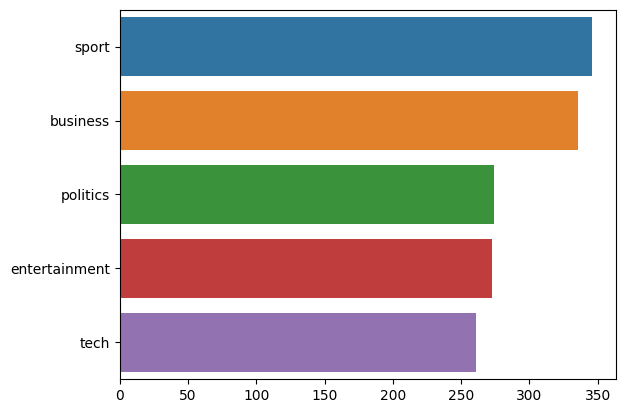

In [11]:
sns.barplot(x=train_data['Category'].value_counts().values,y=train_data['Category'].value_counts().index)

#8.Import Some more libraries for feature extractions, splittig the data and text classification

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
#sample doc
documents = ["This is the first document.",
              "This document is the second document.",
              "And this is the third one.",
              "Is this the first document?"]

In [13]:
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()
# Fit and transform the documents
X = vectorizer.fit_transform(documents)
# Get the feature names (unique words)
feature_names = vectorizer.get_feature_names_out()

# Convert the sparse matrix to a dense array for better visibility
dense_array = X.toarray()

# Display the result
df = pd.DataFrame(data=dense_array, columns=feature_names)
print(df)

   and  document  first  is  one  second  the  third  this
0    0         1      1   1    0       0    1      0     1
1    0         2      0   1    0       1    1      0     1
2    1         0      0   1    1       0    1      1     1
3    0         1      1   1    0       0    1      0     1


#9.Spilliting the data into training and testing

In [17]:
xtrain = np.array(train_data['News_Headline'])
xtest = np.array(test_data['News_Headline'])
ytrain = np.array(train_data['Category'])
ytest = np.array(train_data['Category'])

In [18]:
# Vectorize the text data using CountVectorizer
xtrain_vectorized = vectorizer.fit_transform(xtrain)
xtest_vectorized = vectorizer.transform(xtest)

#10.Build a model fit the model and predict the model

In [19]:
# Create an instance of MultinomialNB
model = MultinomialNB()

In [20]:
# Train the model
model.fit(xtrain_vectorized, ytrain)

MultinomialNB()

In [21]:
# Make predictions on the test set
y_pred = model.predict(xtest_vectorized)

#Prediction
## Demonstraion from the datasets and live from News web sites too

In [22]:
# Assuming you have a new headline for prediction
new_headline = ["qpr keeper day heads for preston queens park"]
# Vectorize the new headline using the same CountVectorizer instance
new_headline_vectorized = vectorizer.transform(new_headline)
# Make predictions using the trained model
predicted_category = model.predict(new_headline_vectorized)
# Print the predicted category
print(f'Predicted Category: {predicted_category[0]}')

Predicted Category: sport


In [24]:
# Assuming you have a new headline for prediction
new_headline = ["Nvidia unveils new chip for training generative AI models"] #from TOI
# Vectorize the new headline using the same CountVectorizer instance
new_headline_vectorized = vectorizer.transform(new_headline)
# Make predictions using the trained model
predicted_category = model.predict(new_headline_vectorized)
# Print the predicted category
print(f'Predicted Category: {predicted_category[0]}')

Predicted Category: tech
